In [48]:
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

Učitati skup podataka *Fashion MNIST* i ispisati broj i veličinu slika u skupu za obučavanje i skupu za testiranje.

In [49]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Izvršiti normalizaciju piksela i eventualno promeniti kodiranje ciljne promenljive.

In [50]:
X_train = X_train / 255
X_test = X_test / 255

numClasses = len(np.unique(y_train))
print(numClasses)

y_train_categorical = to_categorical(y_train, numClasses)
y_test_categorical = to_categorical(y_test, numClasses)

10


Nacrtati prvih $9$ slika iz test skupa, u mreži $3 \times 3$. Kao naslov svake slike postaviti ime klase kojoj slika pripada.

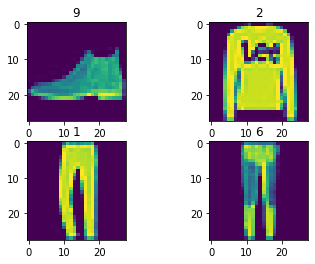

In [51]:
#crtam 4 jer me mrzi 9
fig, axis = plt.subplots(2,2)
axis[0,0].imshow(X_test[0])
axis[0,0].set_title(y_test[0])
axis[0,1].imshow(X_test[1])
axis[0,1].set_title(y_test[1])
axis[1,0].imshow(X_test[2])
axis[1,0].set_title(y_test[2])
axis[1,1].imshow(X_test[3])
axis[1,1].set_title(y_test[4])
plt.show()


Napraviti potpuno povezanu neuronsku mrežu sa sledećom arhitekturom:
- Sloj za ravnanje (Flatten)
- Potpuno povezani sloj sa $64$ neurona i ReLu aktivacionom funkcijom
- Potpuno povezani sloj sa brojem neurona jednakim broju klasa i softmax aktivacionom funkcijom

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [53]:
model = Sequential()

model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dense(numClasses, activation='softmax'))

Obučiti model - postaviti veličinu paketa (batch size) na $64$, broj epoha na $10$.

Iskoristiti $20\%$ trening podataka za validaciju.

In [54]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_categorical, batch_size=64, epochs=10, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 1s 955us/step - loss: 0.5756 - accuracy: 0.8035 - val_loss: 0.4543 - val_accuracy: 0.8414
Epoch 2/10
750/750 [==============================] - 1s 846us/step - loss: 0.4248 - accuracy: 0.8518 - val_loss: 0.4099 - val_accuracy: 0.8560
Epoch 3/10
750/750 [======

Nacrtati grafik promene funkcije greške kroz epohe na skupu za obučavanje i za validaciju.

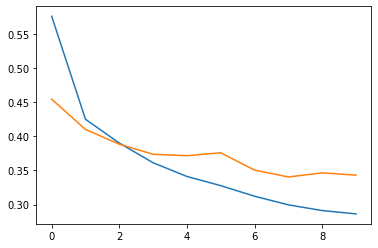

In [55]:
plt.plot(range(10), history.history['loss'])
plt.plot(range(10), history.history['val_loss'])
plt.show()

Nacrtati grafik promene tačnosti kroz epohe na skupu za obučavanje i za validaciju.

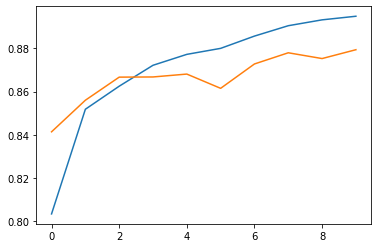

In [56]:
plt.plot(range(10), history.history['accuracy'])
plt.plot(range(10), history.history['val_accuracy'])
plt.show()

Izvršiti evaluaciju modela na skupu za testiranje.

In [57]:
model.evaluate(X_test, y_test_categorical)

313/313 [==============================] - 0s 542us/step - loss: 0.3722 - accuracy: 0.8693


[0.372219055891037, 0.8693000078201294]

Nacrtati istih $9$ instanci kao na početku. Sada pored stvarne klase, dodati i predviđenu klasu u naslov.

In [58]:
y_predicted = model.predict(X_test)

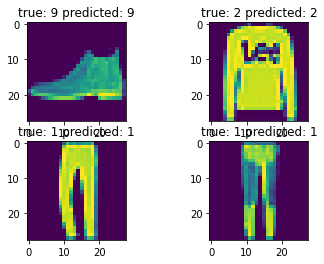

In [59]:
#crtam 4 jer me mrzi 9
fig, axis = plt.subplots(2,2)
axis[0,0].imshow(X_test[0])
axis[0,0].set_title('true: ' + str(y_test[0]) + ' predicted: ' + str(np.argmax(y_predicted[0])))
axis[0,1].imshow(X_test[1])
axis[0,1].set_title('true: ' + str(y_test[1]) + ' predicted: ' + str(np.argmax(y_predicted[1])))
axis[1,0].imshow(X_test[2])
axis[1,0].set_title('true: ' + str(y_test[2]) + ' predicted: ' + str(np.argmax(y_predicted[2])))
axis[1,1].imshow(X_test[3])
axis[1,1].set_title('true: ' + str(y_test[3]) + ' predicted: ' + str(np.argmax(y_predicted[3])))
plt.show()